In [123]:
import pandas as pd 
import numpy as np

excel_file = pd.ExcelFile("./data/dfa_analysis_data.xlsx")

# Print the sheet names
sheet_names = excel_file.sheet_names
sheet_names

['descriptions', 'factors', 'portfolios (total returns)']

In [124]:
df = pd.read_excel("./data/dfa_analysis_data.xlsx", sheet_name="factors")
df = df.set_index("Date")
df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-31,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2024-04-30,-0.0467,-0.0239,-0.0052,0.0047
2024-05-31,0.0434,0.0078,-0.0166,0.0044
2024-06-30,0.0277,-0.0306,-0.0331,0.0041


In [125]:
rf = df['RF']
mkt = df['Mkt-RF']
df = df.drop(columns = ['RF'])
time_sample_1 = df.loc[:'1980',]
time_sample_2 = df.loc['1981':'2001', ]
time_sample_3 = df.loc['2002':, ]



In [126]:
def portfolio_metrics_basic(returns: pd.DataFrame, quantile:float, annualization_factor: float) -> pd.DataFrame: 
    '''
    Returns Annualized ER, Vol, SR, 
    '''
    
    returns_df = pd.DataFrame(index = returns.columns) 
    mu = returns.mean() * annualization_factor
    vol = returns.std() * np.sqrt(annualization_factor)
    sr = mu / vol

    quantile_returns = returns.quantile(quantile)

    
    returns_df['Annnualized Return'] = mu.values 
    returns_df['Annnualized Vol'] = vol.values 
    returns_df['Annnualized SR'] = sr.values
    returns_df['VaR(0.05)'] = quantile_returns
    
    return returns_df

time_samples = [time_sample_1, time_sample_2, time_sample_3]
for time_sample in time_samples:
    print(portfolio_metrics_basic(time_sample, 0.05, 52))
    print('-----')

        Annnualized Return  Annnualized Vol  Annnualized SR  VaR(0.05)
Mkt-RF            0.351596         0.426846        0.823708  -0.083985
SMB               0.147270         0.238493        0.617501  -0.043400
HML               0.214409         0.278580        0.769649  -0.042910
-----
        Annnualized Return  Annnualized Vol  Annnualized SR  VaR(0.05)
Mkt-RF            0.334781         0.327645        1.021779  -0.064545
SMB              -0.003735         0.246357       -0.015161  -0.046515
HML               0.276363         0.231447        1.194069  -0.041790
-----
        Annnualized Return  Annnualized Vol  Annnualized SR  VaR(0.05)
Mkt-RF            0.387782         0.321916        1.204606  -0.078735
SMB               0.047699         0.185151        0.257620  -0.039070
HML               0.002332         0.223462        0.010437  -0.041245
-----


- Yes, but SMB did not between 1981 and 2001. 
- yes, it got smaller and declined to near 0 in the same period. Possibly attributed to the size premia related to the market beta factor
-  yes, declined following the tech bubble burst in 2001

MIN Correlation pair is ('SMB', 'HML'), with a correlation of 0.1207736830392737
MAX Correlation pair is ('SMB', 'Mkt-RF'), with a correlation of 0.31470968049737796


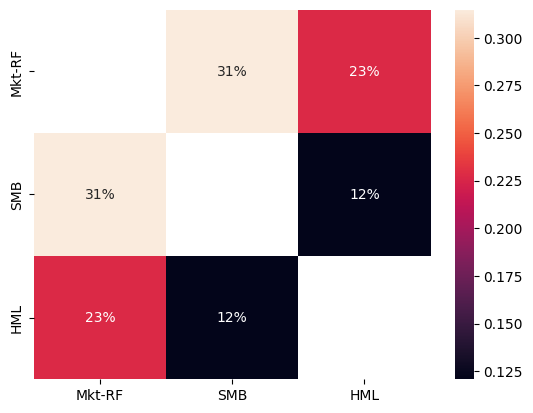

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# full_df = pd.concat([spy.set_index('Date'), df], axis = 1)

def plot_corr(data: pd.DataFrame):
    corr_mtx = data.corr() 
    corr_mtx[corr_mtx==1] = None
    sns.heatmap(corr_mtx,annot=True,fmt='.0%');

    corr_rank = corr_mtx.unstack().sort_values().dropna()
    pair_max = corr_rank.index[-1]
    pair_min = corr_rank.index[0]

    min_corr_value = corr_rank.iloc[0]
    max_corr_value = corr_rank.iloc[-1]
    
    print(f'MIN Correlation pair is {pair_min}, with a correlation of {min_corr_value}')
    print(f'MAX Correlation pair is {pair_max}, with a correlation of {max_corr_value}')
    
plot_corr(df)

MIN Correlation pair is ('SMB', 'HML'), with a correlation of 0.3091334172562327
MAX Correlation pair is ('HML', 'Mkt-RF'), with a correlation of 0.4378482661740347
None


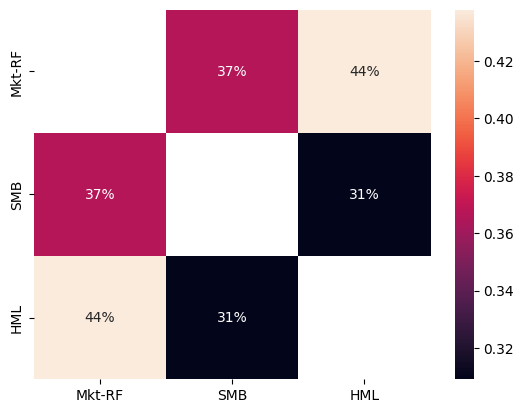

-----
MIN Correlation pair is ('Mkt-RF', 'HML'), with a correlation of -0.5272210294206209
MAX Correlation pair is ('SMB', 'Mkt-RF'), with a correlation of 0.16426406873998825
None


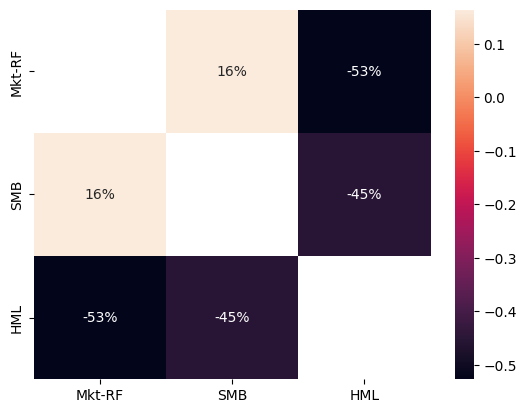

-----
MIN Correlation pair is ('Mkt-RF', 'HML'), with a correlation of 0.12778242585534993
MAX Correlation pair is ('SMB', 'Mkt-RF'), with a correlation of 0.3063094312141418
None


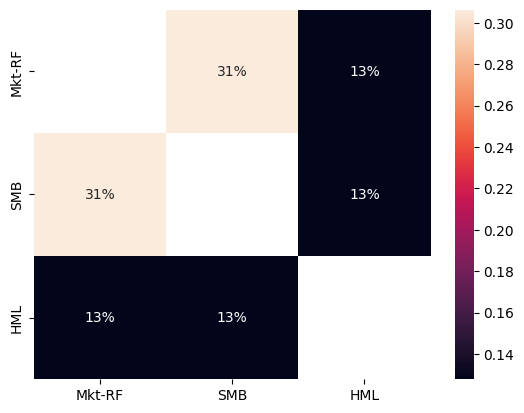

-----


In [128]:
for time_sample in time_samples:
    print(plot_corr(time_sample))
    plt.show()
    print('-----')

(<Axes: xlabel='Date'>, <Axes: xlabel='Date'>, <Axes: xlabel='Date'>)

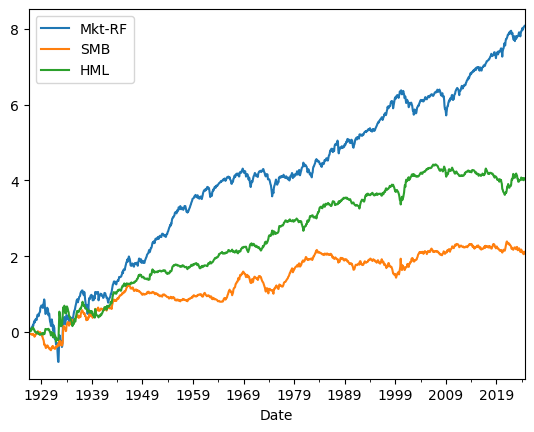

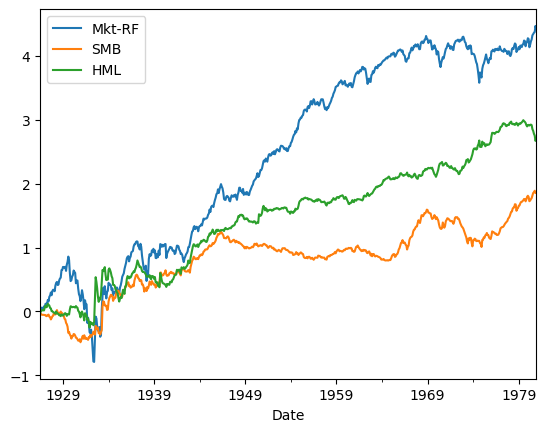

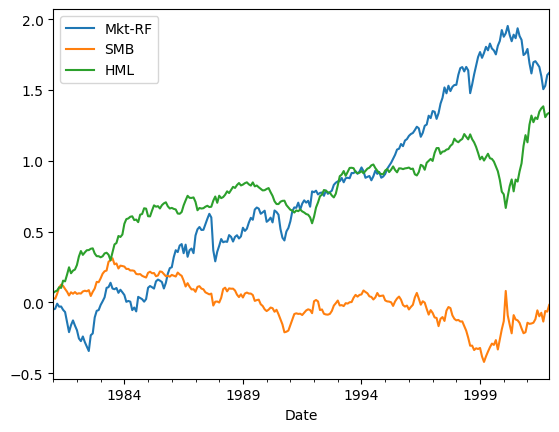

In [129]:
df.cumsum().plot(), time_sample_1.cumsum().plot(), time_sample_2.cumsum().plot()

In [154]:
df = pd.read_excel("./data/dfa_analysis_data.xlsx", sheet_name="portfolios (total returns)")
df = df.set_index("Date")
df.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.058248,-0.017006,0.004875,-0.014580,0.020534,0.012077,0.024192,0.004926,-0.026049,-0.003344,...,0.015893,0.015278,0.012978,0.002727,0.024678,0.034539,0.060902,0.020266,0.031111,0.005623
1926-08-31,-0.020206,-0.080282,0.013796,0.014606,0.083968,0.023618,-0.011849,0.040084,0.005038,0.061675,...,0.013336,0.038730,0.020021,0.021706,0.053422,0.010124,0.041903,0.020131,0.054849,0.077576
1926-09-30,-0.048291,-0.026154,-0.043417,-0.032729,0.008649,-0.026540,-0.012618,0.010829,-0.035480,-0.009401,...,0.010923,-0.005250,-0.017636,0.014646,0.008730,-0.012906,0.036538,0.000950,-0.007487,-0.024284
1926-10-31,-0.093729,-0.035519,-0.034948,0.034413,-0.025476,-0.028069,-0.032663,-0.050745,-0.080191,-0.013213,...,-0.033361,-0.026559,-0.021070,-0.031051,-0.053525,-0.027413,-0.030071,-0.022437,-0.046719,-0.058129
1926-11-30,0.055888,0.041877,0.024623,-0.044494,0.005362,0.031033,-0.023690,0.030078,0.051546,0.027292,...,0.034448,0.023887,0.037335,0.049320,0.018213,0.042946,0.025326,0.015204,0.036619,0.025636


In [155]:
df = pd.merge(df, rf, on = df.index).rename(columns = {'key_0':'Date'})
df = df.set_index('Date')


In [156]:
df['RF'].head()

Date
1926-07-31    0.0022
1926-08-31    0.0025
1926-09-30    0.0023
1926-10-31    0.0032
1926-11-30    0.0031
Name: RF, dtype: float64

In [157]:
assets = list(df.columns)
df[assets] = df[assets].subtract(df['RF'], axis=0)
df.drop(columns = ['RF'], inplace=True)
df.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.056048,-0.019206,0.002675,-0.016780,0.018334,0.009877,0.021992,0.002726,-0.028249,-0.005544,...,0.013693,0.013078,0.010778,0.000527,0.022478,0.032339,0.058702,0.018066,0.028911,0.003423
1926-08-31,-0.022706,-0.082782,0.011296,0.012106,0.081468,0.021118,-0.014349,0.037584,0.002538,0.059175,...,0.010836,0.036230,0.017521,0.019206,0.050922,0.007624,0.039403,0.017631,0.052349,0.075076
1926-09-30,-0.050591,-0.028454,-0.045717,-0.035029,0.006349,-0.028840,-0.014918,0.008529,-0.037780,-0.011701,...,0.008623,-0.007550,-0.019936,0.012346,0.006430,-0.015206,0.034238,-0.001350,-0.009787,-0.026584
1926-10-31,-0.096929,-0.038719,-0.038148,0.031213,-0.028676,-0.031269,-0.035863,-0.053945,-0.083391,-0.016413,...,-0.036561,-0.029759,-0.024270,-0.034251,-0.056725,-0.030613,-0.033271,-0.025637,-0.049919,-0.061329
1926-11-30,0.052788,0.038777,0.021523,-0.047594,0.002262,0.027933,-0.026790,0.026978,0.048446,0.024192,...,0.031348,0.020787,0.034235,0.046220,0.015113,0.039846,0.022226,0.012104,0.033519,0.022536


In [158]:
metrics = portfolio_metrics_basic(df, 0.05, 52)
metrics

,Annnualized Return,Annnualized Vol,Annnualized SR,VaR(0.05)
SMALL LoBM,0.291444,0.863590,0.337479,-0.143356
ME1 BM2,0.350266,0.698495,0.501459,-0.126175
ME1 BM3,0.522625,0.661804,0.789698,-0.104551
ME1 BM4,0.593566,0.595347,0.997009,-0.102151
SMALL HiBM,0.697772,0.665068,1.049174,-0.114089
ME2 BM1,0.330115,0.574319,0.574794,-0.112195
ME2 BM2,0.486678,0.538656,0.903505,-0.097824
ME2 BM3,0.501818,0.519862,0.965289,-0.093545
ME2 BM4,0.538704,0.531333,1.013874,-0.094593
ME2 BM5,0.646674,0.625136,1.034452,-0.112930


MIN Correlation pair is ('Annnualized Vol', 'VaR(0.05)'), with a correlation of -0.9603023430755752
MAX Correlation pair is ('Annnualized Vol', 'Annnualized Return'), with a correlation of 0.21659399513591376


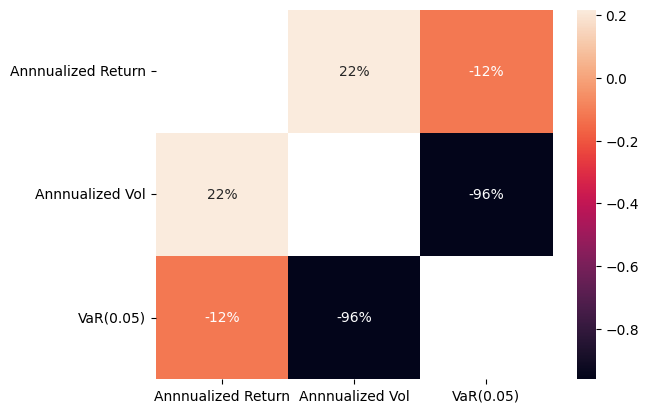

In [159]:
plot_corr(metrics[['Annnualized Return', 'Annnualized Vol', 'VaR(0.05)']])

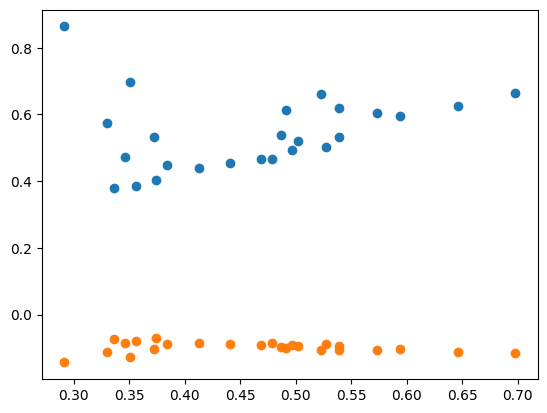

In [160]:
plt.scatter(x=metrics['Annnualized Return'], y=metrics['Annnualized Vol'])
plt.scatter(x=metrics['Annnualized Return'], y=metrics['VaR(0.05)'])


In [161]:
import statsmodels.api as sm 
assets = list(df.columns)
df = pd.merge(df, mkt, on = df.index).rename(columns = {'key_0':'Date'})


In [174]:

def get_params(data, y_col: str, x_col: list):
    
    y = data[y_col]
    x = sm.add_constant(data[x_col])
    model = sm.OLS(y, x).fit()
    r_squared = model.rsquared
    beta = model.params[1]
    alpha = model.params[0]

    residuals = model.resid 
    std_error = np.std(residuals, ddof=1)

    # Annualized ratios. 
    treynor_ratio = (y.mean() * annualization_factor)/beta # amount of returns from asset per unit of risk (beta) taken == systematic risk
    information_ratio = (alpha/std_error)  * np.sqrt(annualization_factor) # sharpe ratio of the non factor component of the return == active risk 
 
    return alpha, beta, r_squared, treynor_ratio, information_ratio
    
capm_df = pd.DataFrame(index = assets) 
for asset in assets: 
    a, b, r, t, i = get_params(df, asset, 'Mkt-RF')
    capm_df.loc[asset, 'Alpha'] = a
    capm_df.loc[asset, 'Beta'] = b
    capm_df.loc[asset, 'R Square'] = r
    capm_df.loc[asset, 'Treynor Ratio'] = t
    capm_df.loc[asset, 'Information Ratio'] = i
capm

/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1075/2587824684.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1075/2587824684.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1075/2587824684.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = m

NameError: name 'capm' is not defined

In [177]:
capm_df['Alpha'].abs().mean()

0.0015906248344976631

In [179]:
df.mean()

Date          1975-08-15 16:57:02.750424448
SMALL LoBM                         0.005605
ME1 BM2                            0.006736
ME1 BM3                             0.01005
ME1 BM4                            0.011415
SMALL HiBM                         0.013419
ME2 BM1                            0.006348
ME2 BM2                            0.009359
ME2 BM3                             0.00965
ME2 BM4                             0.01036
ME2 BM5                            0.012436
ME3 BM1                            0.007155
ME3 BM2                            0.009018
ME3 BM3                              0.0092
ME3 BM4                            0.010143
ME3 BM5                            0.011017
ME4 BM1                            0.007377
ME4 BM2                            0.007938
ME4 BM3                            0.008482
ME4 BM4                            0.009557
ME4 BM5                            0.010371
BIG LoBM                           0.006855
ME5 BM2                         